Change the csv file into a fif file

In [1]:
import numpy as np
import pandas as pd
import mne

# Load the CSV file
csv_path = "s01.csv"  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Display the first few rows to understand the structure
print(df.head())


    13.99    10.55   14.146   13.902  14.289  14.455  10.398  7.6692    15.74  \
0  12.877  10.2760  12.9040  13.5230  13.584  14.254  9.2372  8.0971  14.8250   
1  11.885   9.2391  11.4020  12.5850  13.139  13.690  7.6726  8.1046  13.2010   
2  11.247   7.4189   9.7831  11.0710  13.094  12.756  5.7824  7.6241  10.9050   
3  11.027   5.0727   8.1247   9.1093  13.400  11.574  3.6620  6.7488   8.1425   
4  11.051   2.6737   6.4006   6.9346  13.792  10.356  1.4532  5.6882   5.2249   

   15.315  10.047  6.5063  9.8192  13.829  8.9212  17.561   16.089  18.206  \
0  15.319  9.9637  7.5964  9.6407  14.476  8.7310  19.179  15.6800  17.998   
1  14.868  9.7300  8.4613  9.1667  15.004  8.6521  20.582  14.7290  17.111   
2  13.919  9.2593  9.0354  8.3709  15.364  8.7238  21.685  13.2250  15.476   
3  12.542  8.4682  9.4110  7.2514  15.517  8.7956  22.572  11.2860  13.185   
4  10.880  7.2947  9.7663  5.8276  15.379  8.5409  23.423   9.1122  10.471   

   11.392  
0  12.333  
1  13.404  
2  14.35

In [2]:
# Example: If your dataset has 19 columns (1 time + 18 EEG channels)
num_channels = len(df.columns) - 1  # Excluding time
standard_channels = [f"Ch{i+1}" for i in range(num_channels)]  # Generates Ch1, Ch2, ..., Ch18

df.columns = ["Time"] + standard_channels  # Assign new column names
print(df.head())  # Verify the result


     Time      Ch1      Ch2      Ch3     Ch4     Ch5     Ch6     Ch7      Ch8  \
0  12.877  10.2760  12.9040  13.5230  13.584  14.254  9.2372  8.0971  14.8250   
1  11.885   9.2391  11.4020  12.5850  13.139  13.690  7.6726  8.1046  13.2010   
2  11.247   7.4189   9.7831  11.0710  13.094  12.756  5.7824  7.6241  10.9050   
3  11.027   5.0727   8.1247   9.1093  13.400  11.574  3.6620  6.7488   8.1425   
4  11.051   2.6737   6.4006   6.9346  13.792  10.356  1.4532  5.6882   5.2249   

      Ch9    Ch10    Ch11    Ch12    Ch13    Ch14    Ch15     Ch16    Ch17  \
0  15.319  9.9637  7.5964  9.6407  14.476  8.7310  19.179  15.6800  17.998   
1  14.868  9.7300  8.4613  9.1667  15.004  8.6521  20.582  14.7290  17.111   
2  13.919  9.2593  9.0354  8.3709  15.364  8.7238  21.685  13.2250  15.476   
3  12.542  8.4682  9.4110  7.2514  15.517  8.7956  22.572  11.2860  13.185   
4  10.880  7.2947  9.7663  5.8276  15.379  8.5409  23.423   9.1122  10.471   

     Ch18  
0  12.333  
1  13.404  
2  14.35

In [3]:
import mne
import numpy as np

# Convert column names to a proper list
eeg_channels = list(df.columns[1:])  # Skip "Time" column and convert to list

# Define the sampling rate (adjust based on dataset documentation)
sfreq = 256  # Example: 256 Hz, change if needed

# Convert DataFrame to numpy array (excluding time column)
data = df.iloc[:, 1:].to_numpy().T  # Transpose to match MNE format (channels x samples)

# Create an MNE info object
info = mne.create_info(ch_names=eeg_channels, sfreq=sfreq, ch_types="eeg")

# Create an MNE RawArray
raw = mne.io.RawArray(data, info)

# Plot raw EEG signals
raw.plot(duration=5, scalings="auto")


Creating RawArray with float64 data, n_channels=18, n_times=30999
    Range : 0 ... 30998 =      0.000 ...   121.086 secs
Ready.
Using qt as 2D backend.
Using pyopengl with version 3.1.6


Without ML

Creating RawArray with float64 data, n_channels=18, n_times=30999
    Range : 0 ... 30998 =      0.000 ...   121.086 secs
Ready.
Fitting ICA to data using 18 channels (please be patient, this may take a while)
Selecting by number: 18 components


/var/folders/hl/pf5dtg6x7t53kmb25k2bn7sw0000gn/T/ipykernel_5727/3377441722.py:41: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 8.2s.
Creating RawArray with float64 data, n_channels=18, n_times=30999
    Range : 0 ... 30998 =      0.000 ...   121.086 secs
Ready.
Using pyopengl with version 3.1.6
Applying ICA to Raw instance
    Transforming to ICA space (18 components)
    Zeroing out 0 ICA components
    Projecting back using 18 PCA components
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 122 events and 257 original time points ...
1 bad epochs dropped
Adaptive High Focus Threshold: 0.06110865892576153
Adaptive Medium Focus Threshold: 0.04616134199542335
Using pyopengl with version 3.1.6


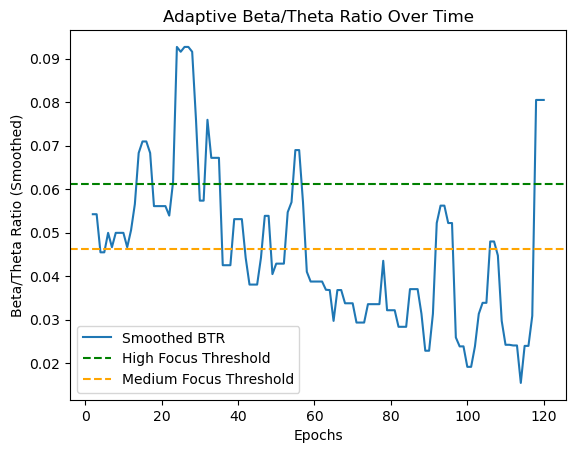

In [4]:
import numpy as np
import pandas as pd
import mne
from scipy.signal import welch
from scipy.stats import zscore
import matplotlib.pyplot as plt

# ========== 1️⃣ Load and Preprocess EEG Data ==========
csv_path = "s02.csv"
df = pd.read_csv(csv_path)

num_channels = len(df.columns) - 1  
eeg_channels = [f"Ch{i+1}" for i in range(num_channels)]
df.columns = ["Time"] + eeg_channels  

sfreq = 256  

data = df.iloc[:, 1:].to_numpy().T
info = mne.create_info(ch_names=eeg_channels, sfreq=sfreq, ch_types="eeg")
raw = mne.io.RawArray(data, info)

# ========== ✅ Apply ICA for Artifact Removal BEFORE Epoching ==========
# Define a mapping from generic channel names to standard 10-20 names
mapping = {
    "Ch1": "Fp1", "Ch2": "Fp2", "Ch3": "F3", "Ch4": "F4",
    "Ch5": "C3", "Ch6": "C4", "Ch7": "P3", "Ch8": "P4",
    "Ch9": "O1", "Ch10": "O2", "Ch11": "F7", "Ch12": "F8",
    "Ch13": "T3", "Ch14": "T4", "Ch15": "T5", "Ch16": "T6",
    "Ch17": "Cz", "Ch18": "Pz"
}

# Rename channels
raw.rename_channels(mapping)

# Apply 10-20 standard montage
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, match_case=False)

ica = mne.preprocessing.ICA(n_components=min(20, len(eeg_channels)), random_state=97)

ica.fit(raw)
ica.plot_sources(raw)

artifact_indices = []  # Add identified artifact component indices here
ica.exclude = artifact_indices
raw_clean = ica.apply(raw)

# ========== 2️⃣ Epoching ==========
epoch_length = 1  
epoch_samples = sfreq * epoch_length  
event_times = np.arange(0, len(df) / sfreq, epoch_length)

event_id = {"Epoch": 1}  
events = np.column_stack((event_times * sfreq, np.zeros_like(event_times), np.ones_like(event_times)))
events = events.astype(int)

epochs = mne.Epochs(raw_clean, events, event_id, tmin=0, tmax=epoch_length, baseline=None, detrend=1)
epoch_data = epochs.get_data()

# ========== 3️⃣ Compute Power Spectral Density (PSD) ==========
freq_bands = {
    "Delta": [0.5, 4.5],
    "Theta": [4.5, 8.5],
    "Alpha": [8.5, 11.5],
    "Sigma": [11.5, 15.5],
    "Beta": [15.5, 30],
}

beta_theta_ratios = []

for epoch in epochs:
    freqs, psd = welch(epoch, sfreq, nperseg=epoch_samples)

    theta_idx = (freqs >= freq_bands["Theta"][0]) & (freqs <= freq_bands["Theta"][1])
    beta_idx = (freqs >= freq_bands["Beta"][0]) & (freqs <= freq_bands["Beta"][1])

    theta_power = np.mean(psd[:, theta_idx])
    beta_power = np.mean(psd[:, beta_idx])

    beta_theta_ratio = beta_power / theta_power if theta_power > 0 else np.nan
    beta_theta_ratios.append(beta_theta_ratio)

df_epochs = pd.DataFrame({"Beta/Theta Ratio": beta_theta_ratios})

# ========== ✅ Apply Median Filtering to Smooth Out Spikes ==========
df_epochs["Beta/Theta Ratio Smoothed"] = df_epochs["Beta/Theta Ratio"].rolling(window=5, center=True).median()

# ========== ✅ Remove Outliers Using Z-Score ==========
df_epochs["Z_Score"] = zscore(df_epochs["Beta/Theta Ratio Smoothed"])
df_epochs.loc[df_epochs["Z_Score"].abs() > 3, "Beta/Theta Ratio Smoothed"] = np.nan  # Remove spikes
df_epochs["Beta/Theta Ratio Smoothed"] = df_epochs["Beta/Theta Ratio Smoothed"].interpolate()  # Fill gaps

# ========== ✅ Compute Adaptive Thresholds for Focus Classification ==========

mean_btr = df_epochs["Beta/Theta Ratio Smoothed"].mean()
std_btr = df_epochs["Beta/Theta Ratio Smoothed"].std()

# Set dynamic focus level cutoffs (you can tweak multipliers)
high_focus_threshold = mean_btr + 0.85 * std_btr
medium_focus_threshold = mean_btr + 0.01 * std_btr

print(f"Adaptive High Focus Threshold: {high_focus_threshold}")
print(f"Adaptive Medium Focus Threshold: {medium_focus_threshold}")

def classify_focus_adaptive(btr):
    if btr > high_focus_threshold:
        return "High Focus"
    elif btr > medium_focus_threshold:
        return "Medium Focus"
    else:
        return "Low Focus"

df_epochs["Focus Level"] = df_epochs["Beta/Theta Ratio Smoothed"].apply(classify_focus_adaptive)

# ========== 5️⃣ Convert Focus Levels to MNE Annotations ==========
annotations = mne.Annotations(
    onset=event_times[: len(df_epochs)],  
    duration=[epoch_length] * len(df_epochs),
    description=df_epochs["Focus Level"].tolist(),  
)

raw_clean.set_annotations(annotations)

# ========== 6️⃣ Plot EEG with Smoothed Beta/Theta Ratio ==========
raw_clean.plot(n_channels=len(eeg_channels), scalings="auto", title="EEG with Adaptive Focus Classification")

plt.plot(df_epochs["Beta/Theta Ratio Smoothed"], label="Smoothed BTR")
plt.axhline(high_focus_threshold, color="green", linestyle="--", label="High Focus Threshold")
plt.axhline(medium_focus_threshold, color="orange", linestyle="--", label="Medium Focus Threshold")
plt.xlabel("Epochs")
plt.ylabel("Beta/Theta Ratio (Smoothed)")
plt.title("Adaptive Beta/Theta Ratio Over Time")
plt.legend()
plt.show()



With K-Means Clustering

Creating RawArray with float64 data, n_channels=18, n_times=30999
    Range : 0 ... 30998 =      0.000 ...   121.086 secs
Ready.
Fitting ICA to data using 18 channels (please be patient, this may take a while)
Selecting by number: 18 components


/var/folders/hl/pf5dtg6x7t53kmb25k2bn7sw0000gn/T/ipykernel_5727/2095608809.py:39: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 4.6s.
Creating RawArray with float64 data, n_channels=18, n_times=30999
    Range : 0 ... 30998 =      0.000 ...   121.086 secs
Ready.
Using pyopengl with version 3.1.6
Applying ICA to Raw instance
    Transforming to ICA space (18 components)
    Zeroing out 0 ICA components
    Projecting back using 18 PCA components
Not setting metadata
122 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 122 events and 257 original time points ...
1 bad epochs dropped
Adaptive High Focus Threshold: 0.01918281611095676
Adaptive Medium Focus Threshold: 0.013372695038821476
Using pyopengl with version 3.1.6


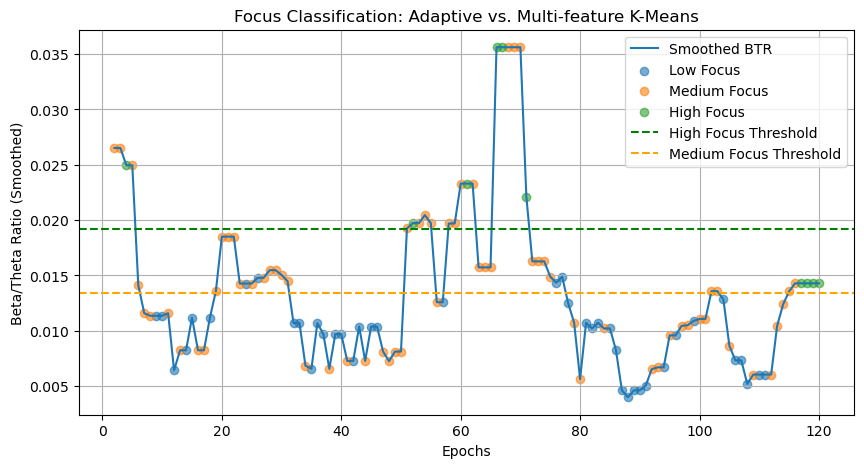

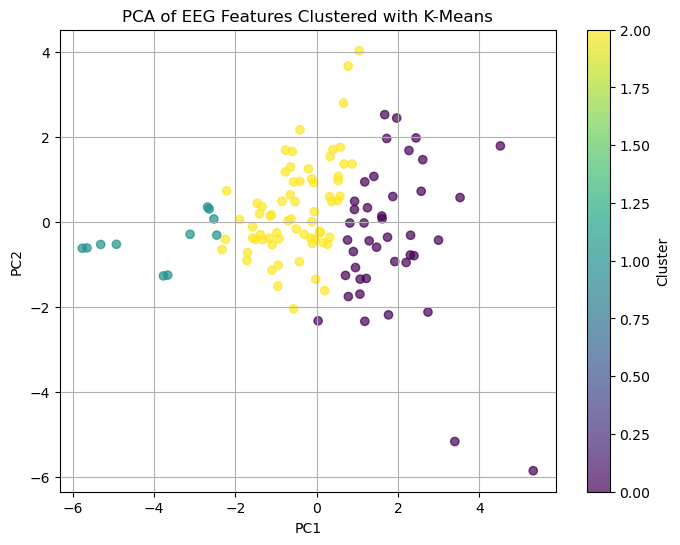

Agreement between Adaptive and K-Means methods: 55.37%


Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


In [ ]:
import numpy as np
import pandas as pd
import mne
from scipy.signal import welch
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading and Preprocessing EEG Data
csv_path = "s00.csv"
df = pd.read_csv(csv_path)

num_channels = len(df.columns) - 1  
eeg_channels = [f"Ch{i+1}" for i in range(num_channels)]
df.columns = ["Time"] + eeg_channels  

sfreq = 256  

data = df.iloc[:, 1:].to_numpy().T
info = mne.create_info(ch_names=eeg_channels, sfreq=sfreq, ch_types="eeg")
raw = mne.io.RawArray(data, info)

# Apply ICA for Artifact Removal BEFORE Epoching 
mapping = {
    "Ch1": "Fp1", "Ch2": "Fp2", "Ch3": "F3", "Ch4": "F4",
    "Ch5": "C3", "Ch6": "C4", "Ch7": "P3", "Ch8": "P4",
    "Ch9": "O1", "Ch10": "O2", "Ch11": "F7", "Ch12": "F8",
    "Ch13": "T3", "Ch14": "T4", "Ch15": "T5", "Ch16": "T6",
    "Ch17": "Cz", "Ch18": "Pz"
}

raw.rename_channels(mapping)
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, match_case=False)

ica = mne.preprocessing.ICA(n_components=min(20, len(eeg_channels)), random_state=97)
ica.fit(raw)
ica.plot_sources(raw)

artifact_indices = []  # Fill this manually after visual inspection
ica.exclude = artifact_indices
raw_clean = ica.apply(raw)

# Epoching
epoch_length = 1  
epoch_samples = sfreq * epoch_length  
event_times = np.arange(0, len(df) / sfreq, epoch_length)

event_id = {"Epoch": 1}  
events = np.column_stack((event_times * sfreq, np.zeros_like(event_times), np.ones_like(event_times))).astype(int)

epochs = mne.Epochs(raw_clean, events, event_id, tmin=0, tmax=epoch_length, baseline=None, detrend=1)
epoch_data = epochs.get_data()

# Compute PSD and Extract Features 
freq_bands = {
    "Delta": [0.5, 4.5],
    "Theta": [4.5, 8.5],
    "Alpha": [8.5, 11.5],
    "Sigma": [11.5, 15.5],
    "Beta": [15.5, 30],
}

features = []
beta_theta_ratios = []

for epoch in epochs:
    freqs, psd = welch(epoch, sfreq, nperseg=epoch_samples)

    theta_idx = (freqs >= freq_bands["Theta"][0]) & (freqs <= freq_bands["Theta"][1])
    beta_idx = (freqs >= freq_bands["Beta"][0]) & (freqs <= freq_bands["Beta"][1])
    alpha_idx = (freqs >= freq_bands["Alpha"][0]) & (freqs <= freq_bands["Alpha"][1])
    sigma_idx = (freqs >= freq_bands["Sigma"][0]) & (freqs <= freq_bands["Sigma"][1])

    theta_power = np.mean(psd[:, theta_idx])
    beta_power = np.mean(psd[:, beta_idx])
    alpha_power = np.mean(psd[:, alpha_idx])
    sigma_power = np.mean(psd[:, sigma_idx])
    total_power = np.mean(psd)

    btr = beta_power / theta_power if theta_power > 0 else np.nan
    atr = alpha_power / beta_power if beta_power > 0 else np.nan
    str_ = sigma_power / beta_power if beta_power > 0 else np.nan

    features.append([theta_power, beta_power, alpha_power, sigma_power, btr, atr, str_, total_power])
    beta_theta_ratios.append(btr)

columns = ["Theta", "Beta", "Alpha", "Sigma", "BTR", "Alpha/Beta", "Sigma/Beta", "Total"]
df_epochs = pd.DataFrame(features, columns=columns)

# Smoothing and Outlier Removal 
df_epochs["BTR_Smoothed"] = pd.Series(beta_theta_ratios).rolling(window=5, center=True).median()
df_epochs["Z_Score"] = zscore(df_epochs["BTR_Smoothed"], nan_policy='omit')
df_epochs.loc[df_epochs["Z_Score"].abs() > 3, "BTR_Smoothed"] = np.nan
df_epochs["BTR_Smoothed"] = df_epochs["BTR_Smoothed"].interpolate()

# Adaptive Threshold Classification 
mean_btr = df_epochs["BTR_Smoothed"].mean()
std_btr = df_epochs["BTR_Smoothed"].std()

high_focus_threshold = mean_btr + 0.85 * std_btr
medium_focus_threshold = mean_btr + 0.01 * std_btr

print(f"Adaptive High Focus Threshold: {high_focus_threshold}")
print(f"Adaptive Medium Focus Threshold: {medium_focus_threshold}")

def classify_focus_adaptive(btr):
    if btr > high_focus_threshold:
        return "High Focus"
    elif btr > medium_focus_threshold:
        return "Medium Focus"
    else:
        return "Low Focus"

df_epochs["Focus Level"] = df_epochs["BTR_Smoothed"].apply(classify_focus_adaptive)

# K-Means Clustering on Multiple Features 
feature_cols = ["Theta", "Beta", "Alpha", "Sigma", "BTR", "Alpha/Beta", "Sigma/Beta", "Total"]
df_epochs_clean = df_epochs.dropna(subset=feature_cols).copy()

X = df_epochs_clean[feature_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

df_epochs_clean["Cluster"] = kmeans.labels_

cluster_means = df_epochs_clean.groupby("Cluster")["BTR_Smoothed"].mean()
sorted_clusters = cluster_means.sort_values().index.tolist()
cluster_to_label = {
    sorted_clusters[0]: "Low Focus",
    sorted_clusters[1]: "Medium Focus",
    sorted_clusters[2]: "High Focus"
}
df_epochs_clean["Focus Cluster"] = df_epochs_clean["Cluster"].map(cluster_to_label)

# dd Annotations 
annotations_adaptive = mne.Annotations(
    onset=event_times[: len(df_epochs)],
    duration=[epoch_length] * len(df_epochs),
    description=df_epochs["Focus Level"].tolist(),
)

annotations_clustered = mne.Annotations(
    onset=event_times[: len(df_epochs_clean)],
    duration=[epoch_length] * len(df_epochs_clean),
    description=df_epochs_clean["Focus Cluster"].tolist(),
)

raw_clean.set_annotations(annotations_adaptive + annotations_clustered)

# Visualization 
raw_clean.plot(n_channels=len(eeg_channels), scalings="auto", title="EEG with Adaptive and Clustered Focus Levels")

plt.figure(figsize=(10, 5))
plt.plot(df_epochs_clean.index, df_epochs_clean["BTR_Smoothed"], label="Smoothed BTR")
for label, color in zip(["Low Focus", "Medium Focus", "High Focus"], ["red", "orange", "green"]):
    idx = df_epochs_clean[df_epochs_clean["Focus Cluster"] == label].index
    plt.scatter(idx, df_epochs_clean.loc[idx, "BTR_Smoothed"], label=label, alpha=0.6)

plt.axhline(high_focus_threshold, color="green", linestyle="--", label="High Focus Threshold")
plt.axhline(medium_focus_threshold, color="orange", linestyle="--", label="Medium Focus Threshold")
plt.xlabel("Epochs")
plt.ylabel("Beta/Theta Ratio (Smoothed)")
plt.title("Focus Classification: Adaptive vs. Multi-feature K-Means")
plt.legend()
plt.grid(True)
plt.show()

# PCA Visualization 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap="viridis", alpha=0.7)
plt.title("PCA of EEG Features Clustered with K-Means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# Comparison 

comparison = df_epochs_clean[["Focus Level"]].copy()
comparison["KMeans Focus"] = df_epochs_clean["Focus Cluster"]

agreement = (comparison["Focus Level"] == comparison["KMeans Focus"]).mean()
print(f"Agreement between Adaptive and K-Means methods: {agreement * 100:.2f}%")
